In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install yfinance
import yfinance as yf

In [ ]:
acoes = ['LIGT3.SA', 'SAPR4.SA', 'ITSA4.SA', 'MXRF11.SA']
carteira = pd.DataFrame()
for i in acoes:
  carteira[i] = yf.download(i, period='1y')['Adj Close']
carteira

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,LIGT3.SA,SAPR4.SA,ITSA4.SA,MXRF11.SA
Date,,,,
2020-08-31,14.354366,5.059215,9.124388,10.67
2020-09-01,15.160790,5.097469,9.424980,10.52
2020-09-02,15.056430,5.212234,9.298925,10.56
2020-09-03,14.914120,5.202670,9.492856,10.59
2020-09-04,14.544113,5.212234,9.473462,10.55
...,...,...,...,...
2021-08-25,15.450000,4.050000,11.490000,9.93
2021-08-26,15.610000,4.060000,11.200000,9.95
2021-08-27,15.220000,4.040000,11.400000,9.95


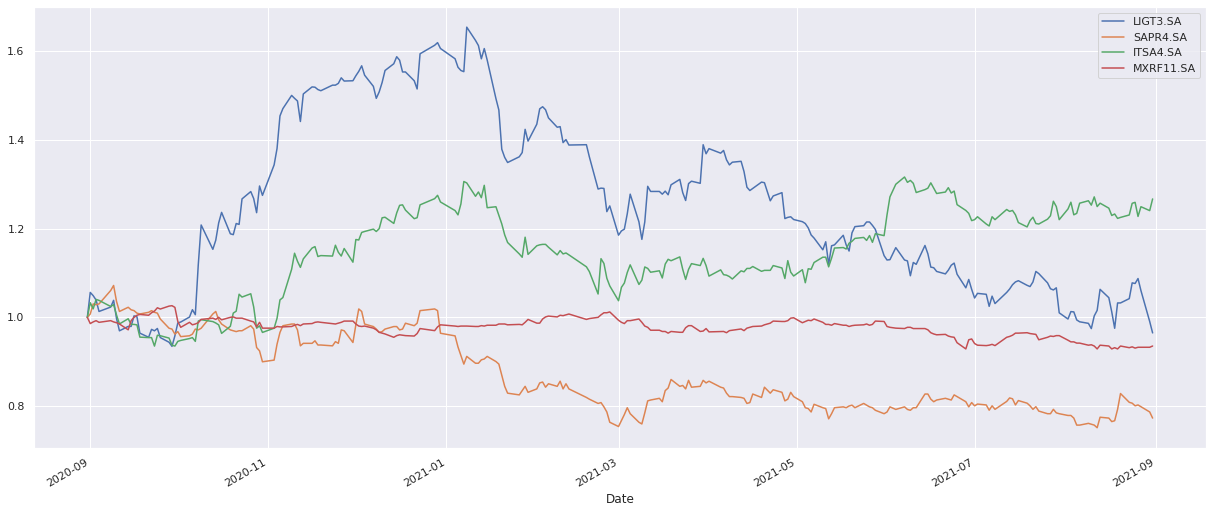

In [ ]:
sns.set()
carteira_normalizada = carteira/carteira.iloc[0]
carteira_normalizada.plot(figsize=(21,9))

In [ ]:
retorno = carteira.pct_change()
retorno

,LIGT3.SA,SAPR4.SA,ITSA4.SA,MXRF11.SA
Date,,,,
2020-08-31,NaN,NaN,NaN,NaN
2020-09-01,0.056180,0.007561,0.032944,-0.014058
2020-09-02,-0.006884,0.022514,-0.013375,0.003802
2020-09-03,-0.009452,-0.001835,0.020855,0.002841
2020-09-04,-0.024809,0.001838,-0.002043,-0.003777
...,...,...,...,...
2021-08-25,-0.001293,-0.007353,0.001744,-0.003012
2021-08-26,0.010356,0.002469,-0.025239,0.002014
2021-08-27,-0.024984,-0.004926,0.017857,0.000000


In [ ]:
retorno_anual = retorno.mean() * 264
retorno_anual

LIGT3.SA     0.039653
SAPR4.SA    -0.246780
ITSA4.SA     0.296281
MXRF11.SA   -0.067585
dtype: float64

In [ ]:
cov = retorno.cov() * 264
cov

,LIGT3.SA,SAPR4.SA,ITSA4.SA,MXRF11.SA
LIGT3.SA,0.158433,0.044250,0.046229,0.003506
SAPR4.SA,0.044250,0.061840,0.025273,0.002209
ITSA4.SA,0.046229,0.025273,0.083307,0.001088
MXRF11.SA,0.003506,0.002209,0.001088,0.008903


In [ ]:
corr = retorno.corr()
corr

,LIGT3.SA,SAPR4.SA,ITSA4.SA,MXRF11.SA
LIGT3.SA,1.000000,0.447045,0.402392,0.093343
SAPR4.SA,0.447045,1.000000,0.352107,0.094165
ITSA4.SA,0.402392,0.352107,1.000000,0.039953
MXRF11.SA,0.093343,0.094165,0.039953,1.000000


In [ ]:
num_acoes = len(acoes)
num_carteiras = 1000000

lista_retornos = []
lista_volatilidade = []
lista_pesos = []
lista_sharpe_ratio = []

In [ ]:
for carteira in range(num_carteiras):
  peso = np.random.random(num_acoes)
  peso /= np.sum(peso)
  lista_pesos.append(peso)
  retorno_esperado = np.dot(peso, retorno_anual)
  lista_retornos.append(retorno_esperado)
  volatilidade = np.sqrt(np.dot(peso.T, np.dot(cov, peso)))
  lista_volatilidade.append(volatilidade)
  sharpe_ratio = retorno_esperado/volatilidade
  lista_sharpe_ratio.append(sharpe_ratio)

In [ ]:
dic_carteiras = {'Retorno': lista_retornos, 'Volatilidade': lista_volatilidade, 'Sharpe Ratio': lista_sharpe_ratio}
for contar,acao in enumerate(acoes):
  dic_carteiras[acao+' Peso'] = [Peso[contar] for Peso in lista_pesos]
portfolios = pd.DataFrame(dic_carteiras)
colunas = ['Retorno', 'Volatilidade', 'Sharpe Ratio'] + [acao+' Peso' for acao in acoes]

portfolios = portfolios[colunas]
portfolios

,Retorno,Volatilidade,Sharpe Ratio,LIGT3.SA Peso,SAPR4.SA Peso,ITSA4.SA Peso,MXRF11.SA Peso
0,-0.059686,0.174313,-0.342407,0.301754,0.252913,0.057329,0.388004
1,0.062836,0.222491,0.282419,0.258752,0.253467,0.406997,0.080783
2,0.036586,0.181879,0.201156,0.164014,0.242682,0.357466,0.235838
3,-0.030266,0.198969,-0.152114,0.405138,0.166936,0.065372,0.362555
4,0.045200,0.241107,0.187467,0.431246,0.177466,0.270263,0.121024
...,...,...,...,...,...,...,...
999995,0.001399,0.208622,0.006707,0.410687,0.148238,0.141553,0.299522
999996,0.021592,0.129343,0.166934,0.026999,0.160064,0.315951,0.496986
999997,0.033431,0.265664,0.125841,0.595851,0.064671,0.133861,0.205618
999998,0.064224,0.212768,0.301848,0.295911,0.176072,0.361746,0.166271


Text(0.5, 1.0, 'Fronteira Eficiente de Markowitz')

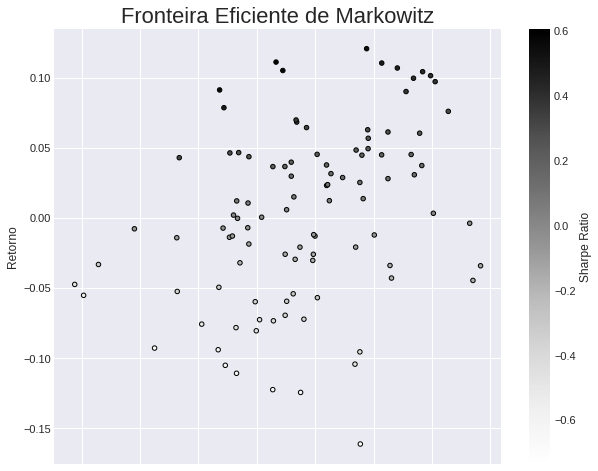

In [ ]:
plt.style.use('seaborn-dark')
portfolios.plot.scatter(x='Volatilidade', y='Retorno', c='Sharpe Ratio', edgecolors='black', figsize=(21,9), grid=True)
plt.xlabel('Volatilidade', fontsize=16)
plt.ylabel('Retorno Esperado', fontsize=16)
plt.title('Fronteira Eficiente de Markowitz', fontsize=22)
plt.savefig('Fronteira.png', dpi = 500)

AttributeError: ignored

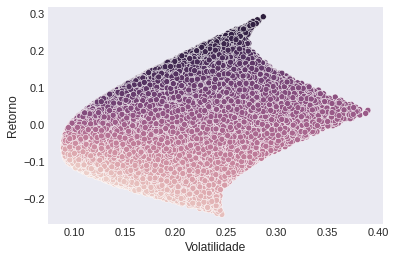

In [ ]:
sns.scatterplot(x = 'Volatilidade', y = 'Retorno', hue = 'Sharpe Ratio', data = portfolios, legend=None)
sns.set_xticklabels('Volatilidade', fontsize = 16)
sns.set_yticklabels('Retorno Esperado', fontsize = 16)
sns.set_title('Fronteira Eficiente de Markowitz', fontsize = 22)

In [ ]:
menor_volatilidade = portfolios['Volatilidade'].min()
carteira_min_variancia = portfolios.loc[portfolios['Volatilidade'] == menor_volatilidade]
carteira_min_variancia.T

In [ ]:
maior_sharpe = portfolios['Sharpe Ratio'].max()
carteira_maior_sharpe = portfolios.loc[portfolios['Sharpe Ratio'] == maior_sharpe]
carteira_maior_sharpe.T